In [1]:
import time
from time import perf_counter as timer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

from tensorflow import keras

from keras.layers import Dense 
from keras.layers import Conv2D 
from keras.layers import MaxPooling2D 
from keras.layers import Flatten , Dropout

from sklearn.model_selection import train_test_split
from keras.regularizers  import l2
from keras import optimizers
from keras.utils.np_utils import to_categorical
from keras.models import Sequential

from utility import loadData, plot_accuracy

Using TensorFlow backend.


In [2]:
X_train, y_train, X_test, y_test = loadData()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [4]:
unique_values = np.unique(y_train)
NUM_CLASSES = len(unique_values) + 1
print("Unique Values: ", unique_values)
print("Number of classes:" , NUM_CLASSES)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

Unique Values:  [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Number of classes: 25


In [5]:

start = timer()

model_cnn = Sequential()
model_cnn.add(Conv2D(64, kernel_size=(4,4), input_shape=(28, 28 ,1), padding='same' , activation = 'relu'))
model_cnn.add(Dropout(0.4))
model_cnn.add(MaxPooling2D(pool_size = (2, 2)))

model_cnn.add(Conv2D(64, kernel_size = (4, 4), padding='same' , activation = 'relu'))
model_cnn.add(Dropout(0.4))
model_cnn.add(MaxPooling2D(pool_size = (2, 2)))

model_cnn.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model_cnn.add(Dropout(0.4))
model_cnn.add(MaxPooling2D(pool_size = (2, 2)))

model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation = 'relu'))
model_cnn.add(Dense(NUM_CLASSES, activation = 'softmax'))

model_cnn.compile(loss ='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

In [6]:
batch_size = 125
epochs = 50
history_model_cnn = model_cnn.fit(X_train, y_train_categorical, epochs= epochs , batch_size = batch_size
                                  , verbose = 1, validation_data=(X_test,y_test_categorical))

Train on 27455 samples, validate on 7172 samples
Epoch 1/50
27455/27455 [==============================] - 149s 5ms/step - loss: 1.6417 - accuracy: 0.4827 - val_loss: 1.0040 - val_accuracy: 0.7963
Epoch 2/50
27455/27455 [==============================] - 127s 5ms/step - loss: 0.2886 - accuracy: 0.8985 - val_loss: 0.5347 - val_accuracy: 0.9274
Epoch 3/50
27455/27455 [==============================] - 128s 5ms/step - loss: 0.1153 - accuracy: 0.9607 - val_loss: 0.2506 - val_accuracy: 0.9685
Epoch 4/50
27455/27455 [==============================] - 121s 4ms/step - loss: 0.0738 - accuracy: 0.9756 - val_loss: 0.2235 - val_accuracy: 0.9767
Epoch 5/50
27455/27455 [==============================] - 118s 4ms/step - loss: 0.0531 - accuracy: 0.9821 - val_loss: 0.2222 - val_accuracy: 0.9575
Epoch 6/50
27455/27455 [==============================] - 118s 4ms/step - loss: 0.0424 - accuracy: 0.9853 - val_loss: 0.1485 - val_accuracy: 0.9686
Epoch 7/50
27455/27455 [==============================] - 119s 

Accuracy and loss of neural network


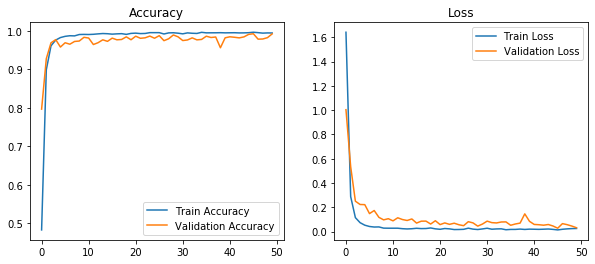

Accuracy and loss of CNN


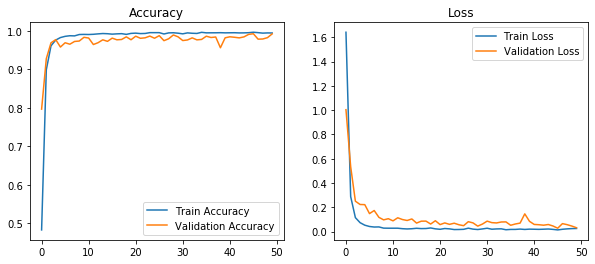

In [8]:
#Check the accuracy of the neural network
print("Accuracy and loss of CNN")
plot_accuracy(history_model_cnn)


In [9]:
end = timer()
elapsed_time = time.gmtime(end - start)
print("Elapsed time:")
print("{0} minutes {1} seconds.".format(elapsed_time.tm_min, elapsed_time.tm_sec))

Elapsed time:
44 minutes 56 seconds.


In [20]:
predicts = model_cnn.predict(x = X_test, verbose=0)
y_pred = np.argmax(predicts, axis=1)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred , average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))

Accuracy: 0.9916341327384273
Precision: 0.9916341327384273
Recall: 0.9916341327384273


In [15]:
# save the model to disk

model_cnn.save('CNN_model.h5')